<a href="https://colab.research.google.com/github/hopeIsCo0l/NLP/blob/main/NLP_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 NLP Assignment 1: Amharic N-gram Language Model
**Course**: Natural Language Processing  
**Dataset**: GPAC – Amharic Corpus  

---

##  Taska
in this notebook addresses the following tasks:
- Create and analyze n-grams (n=1,2,3,4)
- Calculate probabilities and conditional probabilities
- Remove stopwords and analyze again
- Generate word clouds
- Compute sentence probabilities
- Evaluate the models using intrinsic and extrinsic methods


In [ ]:

!pip install wordcloud
import nltk
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from nltk.util import ngrams
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')  # Tokenizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#DownloadTheFile
!pip install gdown
import gdown

# Google Drive file ID
file_id = "1jEOAORylTBAiNKes_JerD6gFF7cnLFyr"
url = f"https://drive.google.com/uc?id={file_id}"

# Output file name
output = "GPAC_Amharic_Corpus.txt"

# Download the file
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1jEOAORylTBAiNKes_JerD6gFF7cnLFyr
From (redirected): https://drive.google.com/uc?id=1jEOAORylTBAiNKes_JerD6gFF7cnLFyr&confirm=t&uuid=fb85d174-f0f8-468c-ba79-cc8cf564a304
To: /content/GPAC_Amharic_Corpus.txt
100%|██████████| 1.06G/1.06G [00:09<00:00, 116MB/s]


'GPAC_Amharic_Corpus.txt'

In [ ]:
#read
with open("GPAC_Amharic_Corpus.txt", 'r', encoding='utf-8') as f:
    raw_text = f.read()

print("Corpus loaded successfully.")
print(raw_text[:1000])  # Show preview


Corpus loaded successfully.
    ምን መሰላችሁ? (አንባቢያን) ኢትዮጵያ በተደጋጋሚ ጥሪው ደርሷት ልትታደመው ያልቻለችው የአለም የእግር ኳስ ዋ ለ19ኛ ጊዜ በደቡብ አፍሪካ ሲጠጣ፣ በሩቅ እያየች አንጀቷ ባረረ ልክ በአመቱ በለስ ቀናትና ሌላ ዋ ልትታደም ሁለት ልጆቿን ወደ ደቡብ አፍሪካ ላከች፡፡6ኛው ቢግ ብራዘርስ አፍሪካ አብሮ የመኖር ውድድር በደቡብ አፍሪካ ተካሂዷል፡፡ ከተለያዩ 14 የአፍሪካ አገራት የተውጣጡ 26 ያህል ተሳታፊዎች የተካፈሉበት ይህ ውድድር፣ ግለሰቦች በፈታኝ ሁኔታ ውስጥ በማለፍ ብቃታቸውን የሚያስመሰክሩበት መሆኑን ሰምተናል፡፡ የሚገጥሟቸውን የተለያዩ ፈተናዎች በትእግስትና በጥበብ ማለፍ፣ ከሌሎች ጋር ተስማምቶ መዝለቅ፣ ችግሮችን በብልጠት መፍታት ወዘተ     በየጊዜው ከሚደረገው ቅነሳ ተርፈው ለ91 ቀናት ያህል በውድድሩ መቆየት የቻሉ ሁለት ተወዳዳሪዎች እያንዳንዳቸው 200 ሺህ ዶላር እንደሚሸለሙም ሲናገር ነበር፡፡ በዘንድሮው ውድድር አገራችን ዳኒ እና ሃኒ የተባሉ ሁለት ወጣቶችን ብታሰልፍም ዳኒ ቀደም ብሎ የቅነሳው ሰለባ ሲሆን ሃኒም በቅርቡ ከውድድር ውጭ ሆናለች፡፡ይህቺን የአገሪቱ ብቸኛ ተስፋ ወደ አሸናፊነት ለማሸጋገር የህዝብ የድጋፍ ድም ወሳኝ መሆኑን የተገነዘበው ወዳጄ ነው እንግዲህ                835  የሚል አገራዊ ጥሪ ያስተላለፈልኝ   ያኔ ሃኒ ከውድድሩ ከመሰናበቷ በፊት፡፡ወዳጄ የአገሩን ስም በአሸናፊነት የማስጠራት ከፍተኛ ጉጉት፣ አገሬ እንዳትሸነፍ የሚል ከፍተኛ ስጋት እንዳደረበት ይሰማኛል፡፡ ጉጉቱ ሳይሆን ስጋቱ የወዳጄን የዋህነት         ፡፡ሃኒም ኢትዮጵያም ይሸነፉ ይሆን? በሚል እንዲህ ከንቱ ስጋት የሚያንገበግባቸውን አገር ወዳድ ዜጐች እኔ የዋሆች እላቸዋለሁ፡፡የዋሆች ሆይ!አትስጉ    ስለ ሃኒ

In [ ]:
#CleaningText
import re

def clean_amharic_text(text):
    text = re.sub(r'[a-zA-Z0-9]', '', text)
    text = re.sub(r'[“”!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text)
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

with open("GPAC_Amharic_Corpus.txt", 'r', encoding='utf-8') as f:
    raw_text = f.read()

cleaned_text = clean_amharic_text(raw_text)
print("Cleaned preview:")
print(cleaned_text[:300])


Cleaned preview:
ምን መሰላችሁ? (አንባቢያን) ኢትዮጵያ በተደጋጋሚ ጥሪው ደርሷት ልትታደመው ያልቻለችው የአለም የእግር ኳስ ዋ ለኛ ጊዜ በደቡብ አፍሪካ ሲጠጣ፣ በሩቅ እያየች አንጀቷ ባረረ ልክ በአመቱ በለስ ቀናትና ሌላ ዋ ልትታደም ሁለት ልጆቿን ወደ ደቡብ አፍሪካ ላከች፡፡ኛው ቢግ ብራዘርስ አፍሪካ አብሮ የመኖር ውድድር በደቡብ አፍሪካ ተካሂዷል፡፡ ከተለያዩ የአፍሪካ አገራት የተውጣጡ ያህል ተሳታፊዎች የተካፈሉበት ይህ ውድድር፣ ግለሰቦች በፈታኝ ሁኔታ ውስጥ በማለፍ ብቃታቸውን የሚያስመሰ


In [ ]:
#TokenizingCleanText
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab') # Download punkt_tab resource

tokens = word_tokenize(cleaned_text)
print(f"Total tokens: {len(tokens)}")
print("Sample tokens:", tokens[:20])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Total tokens: 81017796
Sample tokens: ['ምን', 'መሰላችሁ', '?', '(', 'አንባቢያን', ')', 'ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው', 'ደርሷት', 'ልትታደመው', 'ያልቻለችው', 'የአለም', 'የእግር', 'ኳስ', 'ዋ', 'ለኛ', 'ጊዜ', 'በደቡብ', 'አፍሪካ']


In [ ]:
from collections import Counter

def get_ngram_frequencies(ngrams_list):
    return Counter(ngrams_list)

def calculate_ngram_probabilities(counter):
    total = sum(counter.values())
    return {ngram: count / total for ngram, count in counter.items()}


In [ ]:
#CalculateAndCount_N
#read
with open("GPAC_Amharic_Corpus.txt", 'r', encoding='utf-8') as f:
    raw_text = f.read()

print("Corpus loaded successfully.")
print(raw_text[:1000])  # Show preview

#CleaningText
import re

def clean_amharic_text(text):
    text = re.sub(r'[a-zA-Z0-9]', '', text)
    text = re.sub(r'[“”!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text)
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

cleaned_text = clean_amharic_text(raw_text)
print("Cleaned preview:")
print(cleaned_text[:300])

#TokenizingCleanText
import nltk
from nltk.tokenize import word_tokenize

#Download punkt_tab if not already downloaded:
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

tokens = word_tokenize(cleaned_text)
print(f"Total tokens: {len(tokens)}")
print("Sample tokens:", tokens[:20])


Corpus loaded successfully.
    ምን መሰላችሁ? (አንባቢያን) ኢትዮጵያ በተደጋጋሚ ጥሪው ደርሷት ልትታደመው ያልቻለችው የአለም የእግር ኳስ ዋ ለ19ኛ ጊዜ በደቡብ አፍሪካ ሲጠጣ፣ በሩቅ እያየች አንጀቷ ባረረ ልክ በአመቱ በለስ ቀናትና ሌላ ዋ ልትታደም ሁለት ልጆቿን ወደ ደቡብ አፍሪካ ላከች፡፡6ኛው ቢግ ብራዘርስ አፍሪካ አብሮ የመኖር ውድድር በደቡብ አፍሪካ ተካሂዷል፡፡ ከተለያዩ 14 የአፍሪካ አገራት የተውጣጡ 26 ያህል ተሳታፊዎች የተካፈሉበት ይህ ውድድር፣ ግለሰቦች በፈታኝ ሁኔታ ውስጥ በማለፍ ብቃታቸውን የሚያስመሰክሩበት መሆኑን ሰምተናል፡፡ የሚገጥሟቸውን የተለያዩ ፈተናዎች በትእግስትና በጥበብ ማለፍ፣ ከሌሎች ጋር ተስማምቶ መዝለቅ፣ ችግሮችን በብልጠት መፍታት ወዘተ     በየጊዜው ከሚደረገው ቅነሳ ተርፈው ለ91 ቀናት ያህል በውድድሩ መቆየት የቻሉ ሁለት ተወዳዳሪዎች እያንዳንዳቸው 200 ሺህ ዶላር እንደሚሸለሙም ሲናገር ነበር፡፡ በዘንድሮው ውድድር አገራችን ዳኒ እና ሃኒ የተባሉ ሁለት ወጣቶችን ብታሰልፍም ዳኒ ቀደም ብሎ የቅነሳው ሰለባ ሲሆን ሃኒም በቅርቡ ከውድድር ውጭ ሆናለች፡፡ይህቺን የአገሪቱ ብቸኛ ተስፋ ወደ አሸናፊነት ለማሸጋገር የህዝብ የድጋፍ ድም ወሳኝ መሆኑን የተገነዘበው ወዳጄ ነው እንግዲህ                835  የሚል አገራዊ ጥሪ ያስተላለፈልኝ   ያኔ ሃኒ ከውድድሩ ከመሰናበቷ በፊት፡፡ወዳጄ የአገሩን ስም በአሸናፊነት የማስጠራት ከፍተኛ ጉጉት፣ አገሬ እንዳትሸነፍ የሚል ከፍተኛ ስጋት እንዳደረበት ይሰማኛል፡፡ ጉጉቱ ሳይሆን ስጋቱ የወዳጄን የዋህነት         ፡፡ሃኒም ኢትዮጵያም ይሸነፉ ይሆን? በሚል እንዲህ ከንቱ ስጋት የሚያንገበግባቸውን አገር ወዳድ ዜጐች እኔ የዋሆች እላቸዋለሁ፡፡የዋሆች ሆይ!አትስጉ    ስለ ሃኒ

In [ ]:

from collections import Counter
from nltk.util import ngrams

def get_ngram_frequencies(ngrams_list):
    return Counter(ngrams_list)

def calculate_ngram_probabilities(counter):
    total = sum(counter.values())
    return {ngram: count / total for ngram, count in counter.items()}

#CalculateAndCount_N

# Generate n-grams
unigrams = list(ngrams(tokens, 1))
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))
fourgrams = list(ngrams(tokens, 4))

# Frequency counts
unigram_freq = get_ngram_frequencies(unigrams)
bigram_freq = get_ngram_frequencies(bigrams)
trigram_freq = get_ngram_frequencies(trigrams)
fourgram_freq = get_ngram_frequencies(fourgrams)

# Probabilities
unigram_probs = calculate_ngram_probabilities(unigram_freq)
bigram_probs = calculate_ngram_probabilities(bigram_freq)
trigram_probs = calculate_ngram_probabilities(trigram_freq)
fourgram_probs = calculate_ngram_probabilities(fourgram_freq)

# Show top 10 for each
def print_top_ngrams(freq_dict, prob_dict, n=10):
    print(f"{'N-gram':<60} {'Count':<10} {'Probability'}")
    print("-" * 90)
    for gram, count in freq_dict.most_common(n):
        print(f"{' '.join(gram):<60} {count:<10} {prob_dict[gram]:.6f}")

print("Top 10 Unigrams:")
print_top_ngrams(unigram_freq, unigram_probs)

print("\nTop 10 Bigrams:")
print_top_ngrams(bigram_freq, bigram_probs)

print("\nTop 10 Trigrams:")
print_top_ngrams(trigram_freq, trigram_probs)

print("\nTop 10 Fourgrams:")
print_top_ngrams(fourgram_freq, fourgram_probs)

Top 10 Unigrams:
N-gram                                                       Count      Probability
------------------------------------------------------------------------------------------
።                                                            2181897    0.026931
ነው                                                           784556     0.009684
ላይ                                                           750709     0.009266
፣                                                            714982     0.008825
?                                                            488345     0.006028
፤                                                            411084     0.005074
)                                                            404657     0.004995
(                                                            397904     0.004911
ውስጥ                                                          343933     0.004245
ወደ                                                           329913     0.00407

In [ ]:
# 1.3 Calculate Conditional Probability Using Bigrams (Corrected)

unigrams = tokens  # tokens already split during tokenization
unigram_freq = Counter(unigrams)  # re-create unigram frequency correctly

# Bigrams stay the same
bigrams = list(ngrams(tokens, 2))
bigram_freq = Counter(bigrams)

def calculate_conditional_probabilities(bigram_freq, unigram_freq):
    conditional_probs = {}
    for (w1, w2), bigram_count in bigram_freq.items():
        unigram_count = unigram_freq.get(w1, 0)  # w1 is now a plain string
        if unigram_count > 0:
            conditional_probs[(w1, w2)] = bigram_count / unigram_count
        else:
            conditional_probs[(w1, w2)] = 0
    return conditional_probs

# Calculate all conditional probabilities
conditional_bigram_probs = calculate_conditional_probabilities(bigram_freq, unigram_freq)

# Display Top 10 Conditional Probabilities
def print_top_conditional_probs(cond_probs, n=10):
    sorted_probs = sorted(cond_probs.items(), key=lambda x: x[1], reverse=True)
    print(f"{'First Word':<20} {'Second Word':<20} {'Conditional Probability'}")
    print("-" * 60)
    for (w1, w2), prob in sorted_probs[:n]:
        print(f"{w1:<20} {w2:<20} {prob:.6f}")

print("🔹 Top 10 Conditional Probabilities from Bigrams:")
print_top_conditional_probs(conditional_bigram_probs)


🔹 Top 10 Conditional Probabilities from Bigrams:
First Word           Second Word          Conditional Probability
------------------------------------------------------------
ልትታደመው               ያልቻለችው               1.000000
ልትታደም                ሁለት                  1.000000
ላከች፡፡ኛው              ቢግ                   1.000000
የቅነሳው                ሰለባ                  1.000000
ሆናለች፡፡ይህቺን           የአገሪቱ                1.000000
በፊት፡፡ወዳጄ             የአገሩን                1.000000
፡፡ሃኒም                ኢትዮጵያም               1.000000
እላቸዋለሁ፡፡የዋሆች         ሆይ                   1.000000
ዘልቃለችና፡፡ኢትዮጵያ        ለዘመናት                1.000000
ባለማስነጠቅ              ሃትሪክ                 1.000000


In [ ]:
# Example Amharic stopwords (add more if you want)
amharic_stopwords = set([
    "እና", "በ", "እስከ", "እንደ", "ወደ", "በኩል", "ለ", "ከ", "በላይ", "ስለ", "በታች", "በዚህ", "እዚህ", "እርስዎ",
    "እኔ", "እሱ", "እሷ", "እኛ", "እነሱ", "ነው", "ናት", "ነን", "ናቸው", "አለ", "አሉ", "ነበር", "ነበሩ", "ማን", "ምን", "የ", "ይሁን"
])


In [ ]:
# Remove stopwords from tokens
filtered_tokens = [token for token in tokens if token not in amharic_stopwords]

print(f"Number of tokens after stopword removal: {len(filtered_tokens)}")
print(f"Sample tokens after removal: {filtered_tokens[:20]}")


Number of tokens after stopword removal: 77825549
Sample tokens after removal: ['መሰላችሁ', '?', '(', 'አንባቢያን', ')', 'ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው', 'ደርሷት', 'ልትታደመው', 'ያልቻለችው', 'የአለም', 'የእግር', 'ኳስ', 'ዋ', 'ለኛ', 'ጊዜ', 'በደቡብ', 'አፍሪካ', 'ሲጠጣ፣']


In [ ]:
# Generate new n-grams after stopword removal
filtered_unigrams = filtered_tokens
filtered_bigrams = list(ngrams(filtered_tokens, 2))
filtered_trigrams = list(ngrams(filtered_tokens, 3))
filtered_fourgrams = list(ngrams(filtered_tokens, 4))

# Frequency counts
filtered_unigram_freq = Counter(filtered_unigrams)
filtered_bigram_freq = Counter(filtered_bigrams)
filtered_trigram_freq = Counter(filtered_trigrams)
filtered_fourgram_freq = Counter(filtered_fourgrams)



In [ ]:
# Print top n-grams function
def print_top_ngrams(freq_dict, n=10):
    print(f"{'N-gram':<60} {'Count'}")
    print("-" * 70)
    for gram, count in freq_dict.most_common(n):
        if isinstance(gram, tuple):
            print(f"{' '.join(gram):<60} {count}")
        else:
            print(f"{gram:<60} {count}")

print("Top 10 Unigrams (After Stopword Removal):")
print_top_ngrams(filtered_unigram_freq)

print("\nTop 10 Bigrams (After Stopword Removal):")
print_top_ngrams(filtered_bigram_freq)

print("\nTop 10 Trigrams (After Stopword Removal):")
print_top_ngrams(filtered_trigram_freq)

print("\nTop 10 Fourgrams (After Stopword Removal):")
print_top_ngrams(filtered_fourgram_freq)


Top 10 Unigrams (After Stopword Removal):
N-gram                                                       Count
----------------------------------------------------------------------
።                                                            2181897
ላይ                                                           750709
፣                                                            714982
?                                                            488345
፤                                                            411084
)                                                            404657
(                                                            397904
ውስጥ                                                          343933
!                                                            300736
ጋር                                                           290599

Top 10 Bigrams (After Stopword Removal):
N-gram                                                       Count
------------------------------

In [ ]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
# Install WordCloud and download known Amharic font
!pip install wordcloud
!apt-get install -y fonts-abyssinica

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter

amharic_font_path = "/usr/share/fonts/truetype/abyssinica/AbyssinicaSIL-R.ttf"

def generate_wordcloud(freq_dict, title, font_path=amharic_font_path):
    # If the keys are tuples (bigram/trigram), join into strings
    if isinstance(next(iter(freq_dict)), tuple):
        freq_dict = {" ".join(k): v for k, v in freq_dict.items()}
    else:
        freq_dict = dict(freq_dict)

    # Generate the wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(freq_dict)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts-abyssinica


In [ ]:
!apt-get update
!apt-get install -y fonts-abyssinica


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,901 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,926 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,282 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,245 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd6

In [ ]:
amharic_font_path = "/usr/share/fonts/truetype/abyssinica/AbyssinicaSIL-R.ttf"


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra 

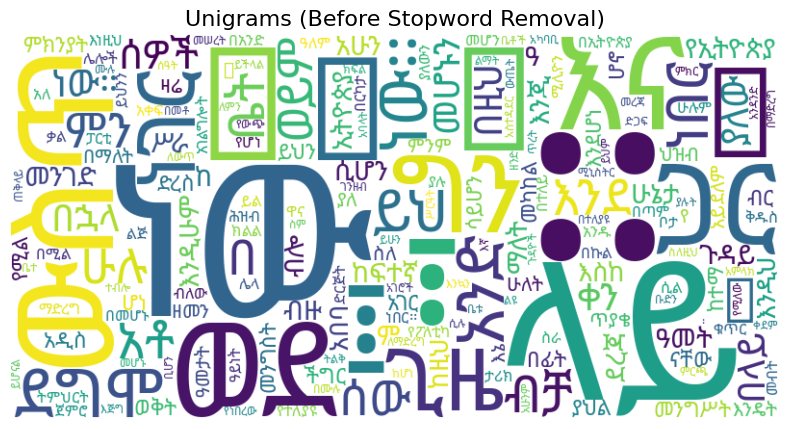

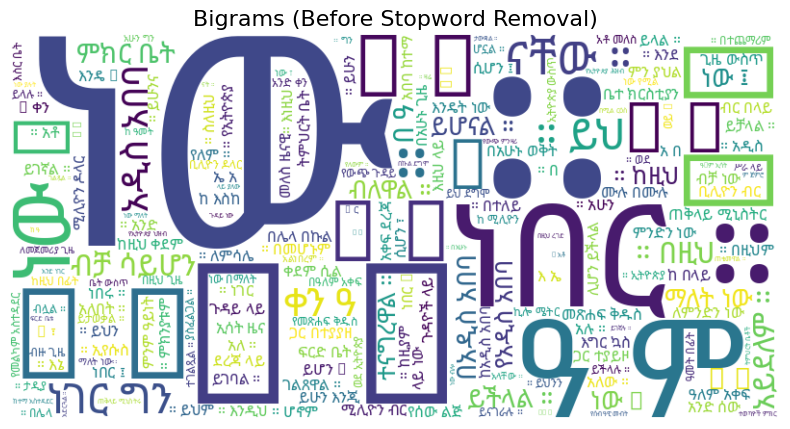

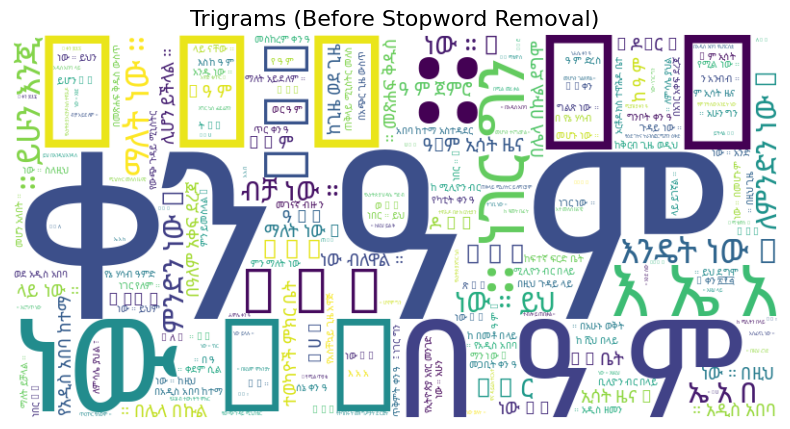

In [ ]:
# Install necessary packages
!pip install wordcloud
!apt-get update
!apt-get install -y fonts-noto

# Import libraries
import gdown
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Set Amharic font path
amharic_font_path = '/usr/share/fonts/truetype/noto/NotoSansEthiopic-Regular.ttf'

# Define WordCloud generator
def generate_wordcloud(freq_dict, title):
    if isinstance(next(iter(freq_dict)), tuple):
        freq_dict = {" ".join(k): v for k, v in freq_dict.items()}
    else:
        freq_dict = dict(freq_dict)

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        font_path=amharic_font_path
    ).generate_from_frequencies(freq_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

print("\n🔹 Generating WordClouds BEFORE Stopword Removal 🔹")
generate_wordcloud(unigram_freq, "Unigrams (Before Stopword Removal)")
generate_wordcloud(bigram_freq, "Bigrams (Before Stopword Removal)")
generate_wordcloud(trigram_freq, "Trigrams (Before Stopword Removal)")


In [ ]:
# 1.6 Sentence Probability Calculation

# Define a function to calculate sentence probability
def calculate_sentence_probability(sentence, conditional_bigram_probs):
    tokens = sentence.split()
    prob = 1.0

    for i in range(len(tokens) - 1):
        bigram = (tokens[i], tokens[i+1])
        bigram_prob = conditional_bigram_probs.get(bigram, 0)

        if bigram_prob == 0:
            print(f"⚠️ Bigram {bigram} not found. Probability = 0")
            return 0

        prob *= bigram_prob

    return prob

# Sentence to calculate
sentence = "ኢትዮጵያ ታሪካዊ ሀገር ናት"

# Make sure you already have conditional_bigram_probs calculated
sentence_prob = calculate_sentence_probability(sentence, conditional_bigram_probs)

print(f"\nProbability of the sentence '{sentence}': {sentence_prob:.10f}")



Probability of the sentence 'ኢትዮጵያ ታሪካዊ ሀገር ናት': 0.0000000054


In [ ]:
# 1.7 Sentence Generation Functions

import random

def generate_sentence_unigram(unigram_freq, length=10):
    words = list(unigram_freq.keys())
    sentence = random.choices(words, weights=unigram_freq.values(), k=length)
    return ' '.join(sentence)


In [ ]:
def generate_sentence_bigram(bigram_freq, start_word=None, length=10):
    sentence = []

    if not start_word:
        start_word = random.choice(list(unigram_counts.keys()))

    sentence.append(start_word)

    for _ in range(length - 1):
        candidates = [(w2, freq) for (w1, w2), freq in bigram_freq.items() if w1 == sentence[-1]]
        if not candidates:
            break
        words, weights = zip(*candidates)
        next_word = random.choices(words, weights=weights)[0]
        sentence.append(next_word)

    return ' '.join(sentence)


In [ ]:
#bigram sentence generator
def generate_sentence_bigram(bigram_freq, start_word=None, length=10):
    sentence = []

    if not start_word:
        start_word = random.choice(list(unigram_counts.keys()))

    sentence.append(start_word)

    for _ in range(length - 1):
        candidates = [(w2, freq) for (w1, w2), freq in bigram_freq.items() if w1 == sentence[-1]]
        if not candidates:
            break
        words, weights = zip(*candidates)
        next_word = random.choices(words, weights=weights)[0]
        sentence.append(next_word)

    return ' '.join(sentence)


In [ ]:
#TriGram Sentence Generator
def generate_sentence_trigram(trigram_freq, start_words=None, length=10):
    sentence = []

    if not start_words:
        start_words = random.choice(list(trigram_freq.keys()))[:2]

    sentence.extend(start_words)

    for _ in range(length - 2):
        prev_bigram = tuple(sentence[-2:])
        candidates = [(w3, freq) for (w1, w2, w3), freq in trigram_freq.items() if (w1, w2) == prev_bigram]
        if not candidates:
            break
        words, weights = zip(*candidates)
        next_word = random.choices(words, weights=weights)[0]
        sentence.append(next_word)

    return ' '.join(sentence)


In [ ]:
def generate_sentence_fourgram(fourgram_freq, start_words=None, length=12):
    sentence = []

    if not start_words:
        start_words = random.choice(list(fourgram_freq.keys()))[:3]

    sentence.extend(start_words)

    for _ in range(length - 3):
        prev_trigram = tuple(sentence[-3:])
        candidates = [(w4, freq) for (w1, w2, w3, w4), freq in fourgram_freq.items() if (w1, w2, w3) == prev_trigram]
        if not candidates:
            break
        words, weights = zip(*candidates)
        next_word = random.choices(words, weights=weights)[0]
        sentence.append(next_word)

    return ' '.join(sentence)


In [ ]:
import random

unigram_counts = unigram_freq

def generate_sentence_unigram(unigram_freq, length=10):
    words = list(unigram_freq.keys())
    sentence = random.choices(words, weights=unigram_freq.values(), k=length)
    return ' '.join(sentence)

print("Unigram Sentence:")
print(generate_sentence_unigram(unigram_counts))


print("Unigram Sentence:")
print(generate_sentence_unigram(unigram_counts))

bigram_counts = bigram_freq

print("\Bigram Sentence:")
print(generate_sentence_bigram(bigram_counts))

trigram_counts = trigram_freq

print("\Trigram Sentence:")
print(generate_sentence_trigram(trigram_counts))

fourgram_counts = fourgram_freq

print("\Fourgram Sentence:")
print(generate_sentence_fourgram(fourgram_counts))

Unigram Sentence:
እሴቶች የተነሳ መስፈርት ባለሙያዎች ማድረግና ጤነኛውን ጥፋቴን ብሔራዊ ጥያቄዎችን መዘዘና
Unigram Sentence:
የጠቅላይ አገሮችን ኢሳይያስ ዘር እየታየ ለብቻቸው ጥቂት ላይ ስልጠና የበዛበት
\Bigram Sentence:
ቢወሰንልኝም ገንዘቡን ለጽህፈት ቤቱ ማዕከላዊ ኮሚቴ እስካሁን ድረስ ምንም ጥርጥር
\Trigram Sentence:
ታውቋል።በግብር ትመና የተነሳ የተቀሰቀስው ህዝባዊ ተቃውሞ ከ በላይ የተሳተፉ ሲሆን፣
\Fourgram Sentence:
የአገሪቱን የመከላከል፣ ዳር ድንበር የማስከበር ላፊነት ያለበት በመሆኑ ይህንን ላፊነቱን በሰላማዊ መንገድ


# Task 2: Intrinsic Evaluation of N-gram Language Models (4%)

Intrinsic evaluation measures how well a language model performs **internally** by calculating how "surprised" the model is by the actual data.

In this task, we evaluate our n-gram language models using **perplexity**, a standard intrinsic metric.

---

## What is Perplexity?

Perplexity is a measure of how well a probability distribution or probability model predicts a sample.

For a given sentence of N words:

$$
\text{Perplexity}(W) = 2^{ -\frac{1}{N} \sum_{i=1}^{N} \log_2 P(w_i \mid w_{i-1}) }
$$

- **Lower perplexity** means better prediction.
- **Higher perplexity** means the model is more "confused" or uncertain.

---

We will use **conditional bigram probabilities** from our model to compute perplexity on one or more Amharic test sentences.


In [ ]:
import math

def calculate_perplexity(sentence, conditional_probs):
    tokens = sentence.split()
    N = len(tokens)
    log_prob = 0

    for i in range(1, N):
        bigram = (tokens[i - 1], tokens[i])
        prob = conditional_probs.get(bigram, 1e-8)  # Small smoothing if unseen
        log_prob += math.log2(prob)

    perplexity = 2 ** (-log_prob / N)
    return perplexity


In [ ]:
# Sentence from your corpus or test input
test_sentence = "ኢትዮጵያ ታሪካዊ ሀገር ናት"

# Calculate perplexity
perplexity_score = calculate_perplexity(test_sentence, conditional_bigram_probs)

print(f"🔹 Perplexity of the sentence '{test_sentence}': {perplexity_score:.4f}")


🔹 Perplexity of the sentence 'ኢትዮጵያ ታሪካዊ ሀገር ናት': 116.8345


In [ ]:
test_sentences = [
    "ኢትዮጵያ ታሪካዊ ሀገር ናት",
    "እናቱ በቤት ናት",
    "ጄምስ ቦንድ ፊልም አለ"
]

for s in test_sentences:
    p = calculate_perplexity(s, conditional_bigram_probs)
    print(f"Perplexity for '{s}': {p:.4f}")


Perplexity for 'ኢትዮጵያ ታሪካዊ ሀገር ናት': 116.8345
Perplexity for 'እናቱ በቤት ናት': 215443.4690
Perplexity for 'ጄምስ ቦንድ ፊልም አለ': 59.1185


# Task 3: Extrinsic Evaluation of N-gram Language Models (4%)

While intrinsic evaluation measures how well a language model performs internally, **extrinsic evaluation** tests how useful the model is in a **real-world application**.

In this task, we use our n-gram language models as features in a **Naive Bayes text classification** task.  
We demonstrate how well the model helps distinguish between different types of Amharic sentences, such as news-related vs entertainment-related content.

---

## Why Use Extrinsic Evaluation?

- It shows the **practical value** of the language model.
- It allows us to evaluate the model using metrics like **accuracy**, **precision**, **recall**, and **F1-score**.
- We use **n-gram features** (unigrams, bigrams, and trigrams) to represent each sentence for classification.

We now proceed to train and evaluate a classifier using these features.


In [ ]:
# Labeled sample dataset (Amharic sentences)
sentences = [
    "ኢትዮጵያ ታሪካዊ ሀገር ናት",         # class 0 (e.g., about Ethiopia)
    "አብይ አህመድ ጠቅላይ ሚኒስትሩ ናቸው",    # class 0
    "ጄምስ ቦንድ ፊልም አለ",              # class 1 (e.g., movie)
    "አናንዴ የፍቅር ታሪክ ነው",            # class 1
]

labels = [0, 0, 1, 1]  # Two topics: 0 = historical/news, 1 = entertainment


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25, random_state=42)

# Use unigrams, bigrams, trigrams
vectorizer = CountVectorizer(ngram_range=(1, 3))  # Use 1-3 grams
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# Train
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict
y_pred = clf.predict(X_test_vec)

# Evaluate
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


🔹 Accuracy: 0.0
🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

